In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import cv2

Using TensorFlow backend.


In [2]:
path = r"/Users/wendy/Documents/GitHub/UMAP/Crypto_punks"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
punks = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
    # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
            # adds only the image files to the flowers list
             punks.append(file.name)

In [3]:
punk_index = []
for i in range(len(punks)):
    punk_n = punks[i].replace(".png", '')
    punk_n1 = "Punk" + punk_n
    punk_index.append(punk_n1)

In [4]:
data = {}
p = r"/Users/wendy/Documents/GitHub/UMAP/Crypto_punks/"
def reshape_images(file):
    img = cv2.imread(file)
    img = np.array(img)
    reshaped_img = img.flatten()
    return (reshaped_img)

for punk in punks:
    # try to extract the features and update the dictionary
    try:
        feat = reshape_images(p+punk)
        data[punk] = feat
        
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

In [5]:
data1 = list(data.values())
an_array = np.array(data1)
idx = np.argwhere(np.all(an_array[..., :] == 0, axis=0))
a2 = np.delete(an_array, idx, axis=1)

In [6]:
import statsmodels.tsa.arima_process as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import umap
import math
%matplotlib inline

In [12]:
import random
random.seed(10)
reducer = umap.UMAP(random_state=123, n_neighbors=10, min_dist =0.1)
embedding = reducer.fit_transform(a2)

/Users/wendy/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



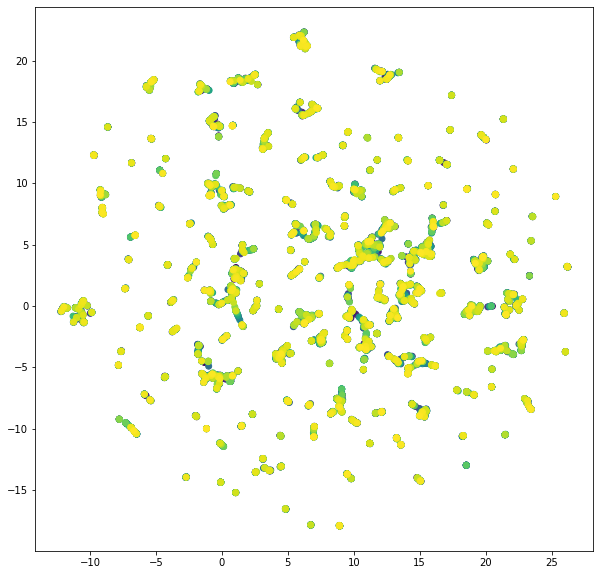

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = np.arange(embedding.shape[0]))


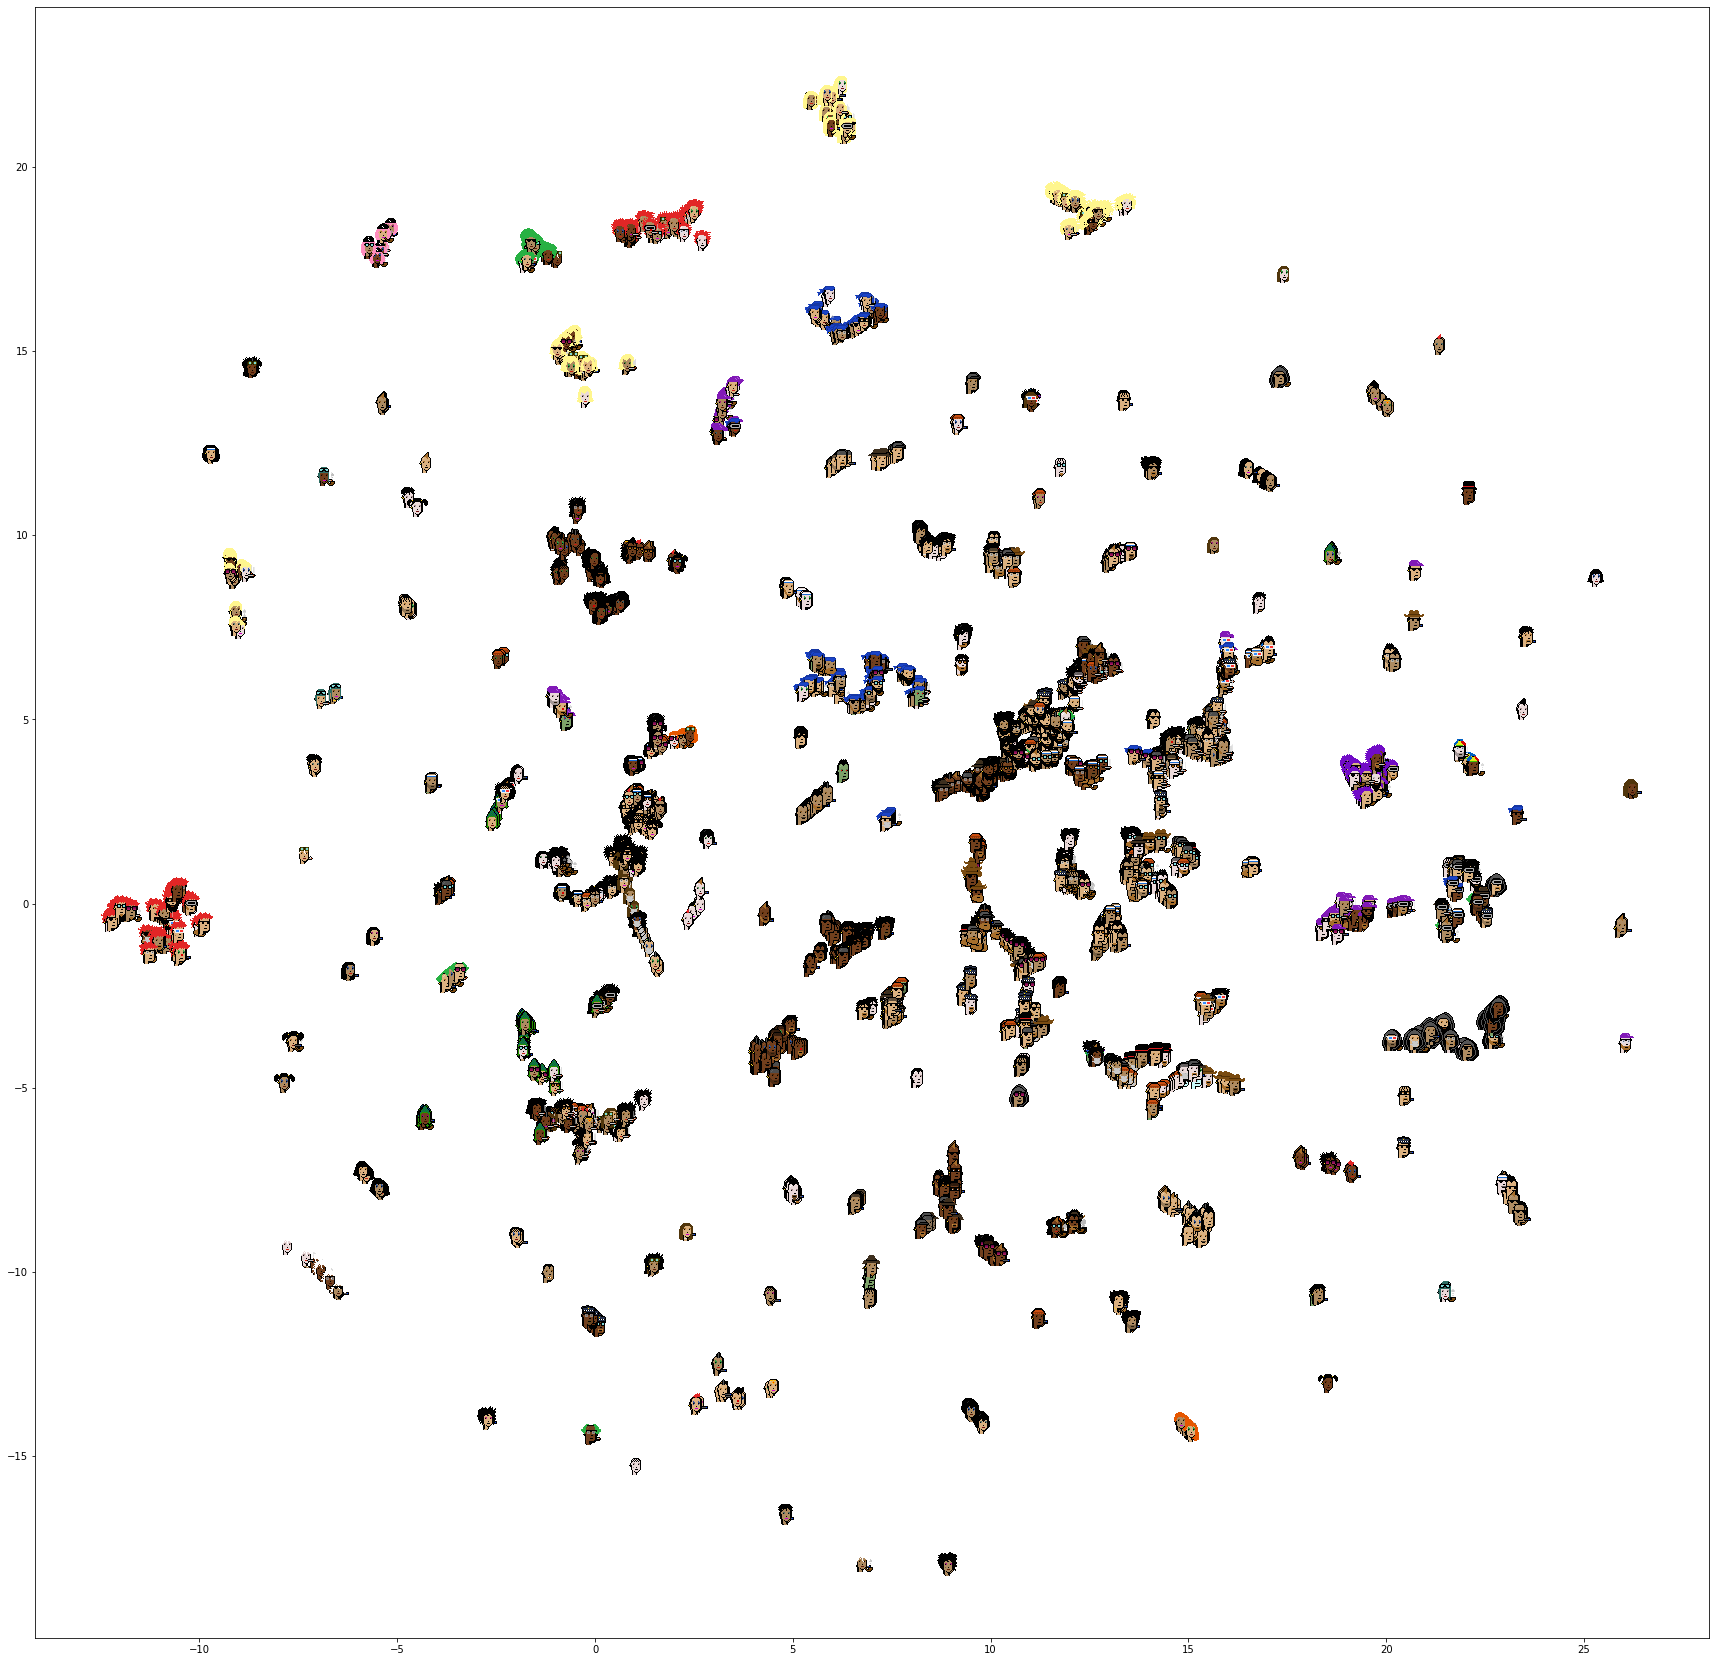

In [18]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


img_path = []
for punk in punks:
    path = p+punk
    img_path.append(path)

def getImage(path):
    return OffsetImage(plt.imread(path))

fig, ax = plt.subplots(figsize=(30,30))
ax.scatter(embedding[:, 0], embedding[:, 1]) 

for x0, y0, path in zip(embedding[:, 0], embedding[:, 1],img_path):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.savefig('/Users/wendy/Documents/GitHub/UMAP/CryptoPunks_UMAP_3.png',transparent=True)

In [20]:
DT = pd.DataFrame(embedding,columns ={'D1','D2'})
DT["punk_index"] = punk_index
DT.set_index("punk_index", drop=True)

,D1,D2
punk_index,,
Punk3975,-1.766602,-3.205225
Punk8820,13.481961,0.927173
Punk9280,16.032841,6.524354
Punk1804,-7.089222,3.802928
Punk4968,14.447953,-8.013934
...,...,...
Punk4965,14.893010,1.050387
Punk8187,0.055339,-2.735028
Punk9299,15.149743,-4.458200


In [21]:
import plotly.express as px
df = DT
fig = px.scatter(df, x='D1', y='D2', color= np.arange(embedding.shape[0]),width=800, height=800, hover_data=["punk_index"])
fig.show()
fig.write_html("CryptoPunks_UMAP.html")